In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Importar funciones del notebook de utilidades
# Usamos %run para ejecutar el notebook completo y tener acceso a todas las funciones
%run ../utils/funcions.ipynb

# Verificar que la función está disponible
print("✓ Funciones importadas correctamente")

✓ Funciones importadas correctamente


In [4]:
file_path = '../data/results/capacidad_acumulada_processed.csv'


df = load_capacidad_csv_data(file_path, sep=',', decimal='.')
df.head()

,Fecha,SOLAR,EOLICA,PCH
0,2019-01-31,42.539465,0.0,0.7
1,2019-02-28,42.539465,0.0,0.7
2,2019-03-31,42.539465,0.0,0.7
3,2019-04-30,42.539465,0.0,0.7
4,2019-05-31,43.595340,0.0,0.7


In [5]:
df.tail()

,Fecha,SOLAR,EOLICA,PCH
77,2025-06-30,2905.793884,41.0,20.615945
78,2025-07-31,2907.402217,41.0,20.615945
79,2025-08-31,2909.382217,41.0,20.615945
80,2025-09-30,2909.382217,41.0,20.615945
81,2025-10-31,2909.382217,41.0,20.615945


In [6]:
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
fecha_base = df['Fecha'].min()
X = (df['Fecha'] - fecha_base).dt.days.values.reshape(-1, 1)
y = df['SOLAR']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo_rl = LinearRegression()
modelo_rl.fit(X_train, y_train)
y_pred = modelo_rl.predict(X_test)

--- Evaluación del Modelo (SOLAR vs. Días) ---
R² (Varianza Explicada): 0.7423
Error Cuadrático Medio (MSE): 175946.40
Pendiente (Coeficiente): 1.1612
Intercepto: -639.9732


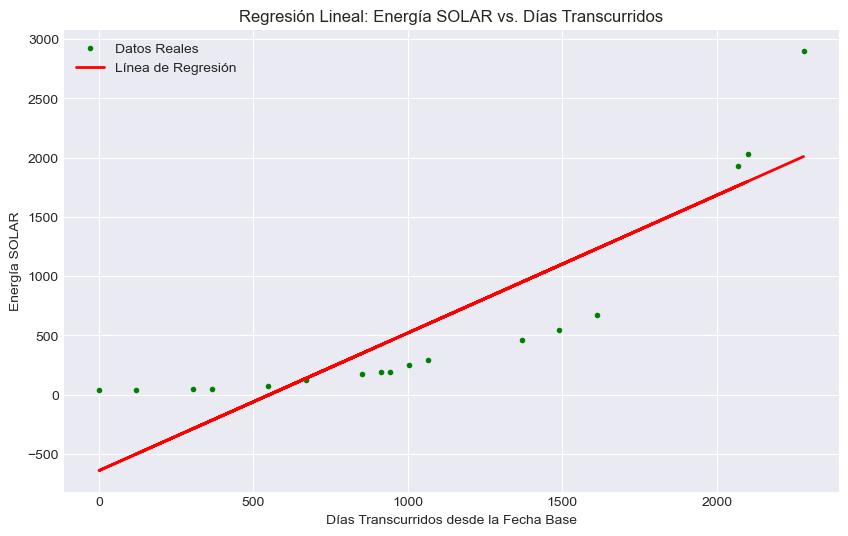

In [8]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("--- Evaluación del Modelo (SOLAR vs. Días) ---")
print(f"R² (Varianza Explicada): {r2:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Pendiente (Coeficiente): {modelo_rl.coef_[0]:.4f}")
print(f"Intercepto: {modelo_rl.intercept_:.4f}")
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='green', label='Datos Reales', marker='.')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal: Energía SOLAR vs. Días Transcurridos')
plt.xlabel('Días Transcurridos desde la Fecha Base')
plt.ylabel('Energía SOLAR')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
df['Mes_Index'] = np.arange(1, len(df) + 1)

N_historico = df['Mes_Index'].max()
print(f"Número total de meses históricos (N): {N_historico}")

X_historico = df[['Mes_Index']].values  
Y_historico = df['SOLAR'].values

Número total de meses históricos (N): 82


In [23]:
modelo = LinearRegression()
modelo.fit(X_historico, Y_historico)

beta_0 = modelo.intercept_
beta_1 = modelo.coef_[0]

print(f"\nModelo de Regresión Ajustado:")
print(f"SOLAR = {beta_0:.2f} + {beta_1:.2f} * Mes_Index")


Modelo de Regresión Ajustado:
SOLAR = -647.21 + 34.74 * Mes_Index


In [45]:
meses_a_predecir = 10
indices_futuros = np.arange(N_historico + 1, N_historico + meses_a_predecir + 1)

X_futuro = indices_futuros.reshape(-1, 1)

predicciones_solar = modelo.predict(X_futuro)

fecha_final_historica = df['Fecha'].max()
fechas_futuras = pd.date_range(
    start=fecha_final_historica, 
    periods=meses_a_predecir + 1, 
    freq='M'
)[1:] 

resultados = pd.DataFrame({
    'Mes_Index': indices_futuros,
    'Fecha': fechas_futuras,
    'SOLAR': predicciones_solar
})

print("\n--- Predicción de la Tendencia Solar (Próximos 10 Meses) ---")
print(resultados.to_markdown(index=False, floatfmt=".2f"))


--- Predicción de la Tendencia Solar (Próximos 10 Meses) ---
|   Mes_Index | Fecha               |   SOLAR |
|------------:|:--------------------|--------:|
|          83 | 2025-11-30 00:00:00 | 2236.53 |
|          84 | 2025-12-31 00:00:00 | 2271.27 |
|          85 | 2026-01-31 00:00:00 | 2306.01 |
|          86 | 2026-02-28 00:00:00 | 2340.76 |
|          87 | 2026-03-31 00:00:00 | 2375.50 |
|          88 | 2026-04-30 00:00:00 | 2410.25 |
|          89 | 2026-05-31 00:00:00 | 2444.99 |
|          90 | 2026-06-30 00:00:00 | 2479.73 |
|          91 | 2026-07-31 00:00:00 | 2514.48 |
|          92 | 2026-08-31 00:00:00 | 2549.22 |


In [46]:
resultados['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
fecha_base = resultados['Fecha'].min()
X_pred = (resultados['Fecha'] - fecha_base).dt.days.values.reshape(-1, 1)
y_pred = resultados['SOLAR']

In [47]:
X_train_pred, X_test_pred, y_train_pred, y_test_pred = train_test_split(X_pred, y_pred, test_size=0.2, random_state=42)
modelo_rl_pred = LinearRegression()
modelo_rl_pred.fit(X_train_pred, y_train_pred)
y_pred_pred = modelo_rl_pred.predict(X_test_pred)

--- Evaluación del Modelo (SOLAR vs. Días) ---
R² (Varianza Explicada): 1.0000
Error Cuadrático Medio (MSE): 0.71
Pendiente (Coeficiente): 1.1423
Intercepto: 2238.0950


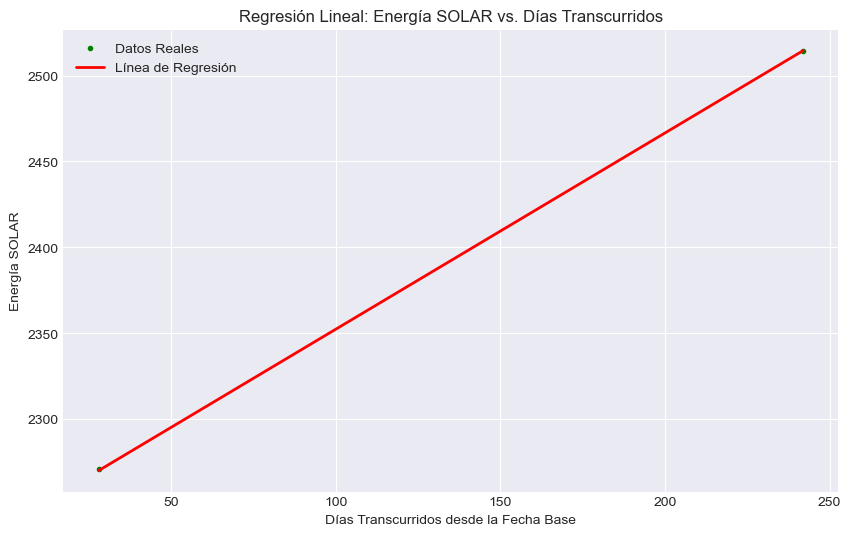

In [48]:
r2_pred = r2_score(y_test_pred, y_pred_pred)
mse_pred = mean_squared_error(y_test_pred, y_pred_pred)
print("--- Evaluación del Modelo (SOLAR vs. Días) ---")
print(f"R² (Varianza Explicada): {r2_pred:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse_pred:.2f}")
print(f"Pendiente (Coeficiente): {modelo_rl_pred.coef_[0]:.4f}")
print(f"Intercepto: {modelo_rl_pred.intercept_:.4f}")
plt.figure(figsize=(10, 6))
plt.scatter(X_test_pred, y_test_pred, color='green', label='Datos Reales', marker='.')
plt.plot(X_test_pred, y_pred_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal: Energía SOLAR vs. Días Transcurridos')
plt.xlabel('Días Transcurridos desde la Fecha Base')
plt.ylabel('Energía SOLAR')
plt.legend()
plt.grid(True)
plt.show()